In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-07-05 12:55:27.259670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 12:55:27.287839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 12:55:27.288045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
import os
import zipfile #to handle zip file

local_zip = '/home/piyush/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('malaria_cells')
zip_ref.close()

In [3]:
os.listdir('malaria_cells')

['Malaria Cells', 'single_prediction', 'validation', 'train']

In [4]:
os.listdir('malaria_cells/validation')

['Parasitized', 'Uninfected']

In [5]:
os.listdir('malaria_cells/validation/Parasitized')

['C70P31_ThinF_IMG_20150819_142239_cell_2.png',
 'C119P80ThinF_IMG_20151002_122720_cell_169.png',
 'C39P4thinF_original_IMG_20150622_111723_cell_90.png',
 'C99P60ThinF_IMG_20150918_141620_cell_37.png',
 'C118P79ThinF_IMG_20151002_104831_cell_166.png',
 'C59P20thinF_IMG_20150803_113809_cell_8.png',
 'C48P9thinF_IMG_20150721_161055_cell_171.png',
 'C101P62ThinF_IMG_20150923_165215_cell_24.png',
 'C117P78ThinF_IMG_20150930_221812_cell_78.png',
 'C101P62ThinF_IMG_20150918_151942_cell_88.png',
 'C118P79ThinF_IMG_20151002_110002_cell_25.png',
 'C91P52ThinF_IMG_20150821_124311_cell_25.png',
 'C59P20thinF_IMG_20150803_112802_cell_192.png',
 'C113P74ThinF_IMG_20150930_140646_cell_188.png',
 'C129P90ThinF_IMG_20151004_133329_cell_109.png',
 'C61P22N_ThinF_IMG_20150818_112704_cell_216.png',
 'C116P77ThinF_IMG_20150930_171739_cell_101.png',
 'C116P77ThinF_IMG_20150930_171558_cell_99.png',
 'C129P90ThinF_IMG_20151004_133538_cell_96.png',
 'C84P45ThinF_IMG_20150818_101146_cell_102.png',
 'C126P87Thi

In [6]:
len(os.listdir('malaria_cells/validation/Parasitized'))

7952

In [7]:
len(os.listdir('malaria_cells/validation/Uninfected'))

7880

In [8]:
len(os.listdir('malaria_cells/train/Parasitized'))

13780

In [9]:
len(os.listdir('malaria_cells/train/Uninfected'))

13780

In [10]:
for fname in os.listdir('malaria_cells/train/Uninfected'):
  print(fname)

C92P53ThinF_IMG_20150821_151646_cell_169.png
C188P149ThinF_IMG_20151203_134209_cell_190.png
C113P74ThinF_IMG_20150930_134751_cell_30.png
C109P70ThinF_IMG_20150930_102716_cell_33.png
C239ThinF_IMG_20151127_113202_cell_12.png
C232ThinF_IMG_20151112_154251_cell_276.png
C145P106ThinF_IMG_20151016_154756_cell_51.png
C203ThinF_IMG_20151029_102123_cell_6.png
C93P54ThinF_IMG_20150821_163815_cell_197.png
C201ThinF_IMG_20150930_143502_cell_155.png
C91P52ThinF_IMG_20150821_123116_cell_159.png
C127P88ThinF_IMG_20151004_112004_cell_130.png
C77P38ThinF_IMG_20150601_152941_cell_47.png
C241NThinF_IMG_20151207_124608_cell_40.png
C87P48ThinF_IMG_20150820_132514_cell_177.png
C76P37ThinF_IMG_20150815_172902_cell_115.png
C225ThinF_IMG_20151112_113735_cell_166.png
C84P45ThinF_IMG_20150818_101146_cell_76.png
C121P82ThinF_IMG_20151002_134953_cell_37.png
C141P102ThinF_IMG_20151005_215348_cell_12.png
C182P143NThinF_IMG_20151201_172524_cell_10.png
C227ThinF_IMG_20151112_135422_cell_226.png
C164P125ThinF_IMG_2015

In [11]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [12]:
image_1 = load_img('malaria_cells/train/Uninfected/C225ThinF_IMG_20151112_113735_cell_166.png')

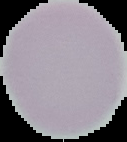

In [13]:
image_1

In [14]:
image_2 = load_img('malaria_cells/validation/Parasitized/C113P74ThinF_IMG_20150930_140646_cell_188.png')

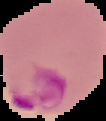

In [15]:
image_2

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [17]:
path = os.path.join('malaria_cells')

In [18]:
path

'malaria_cells'

In [19]:
train_dir = os.path.join(path,'train')

In [20]:
train_dir

'malaria_cells/train'

In [21]:
validation_dir = os.path.join(path,'validation')

In [22]:
validation_dir

'malaria_cells/validation'

In [23]:
train_Parasitized_dir = os.path.join(train_dir,'Parasitized')
train_Uninfected_dir = os.path.join(train_dir,'Uninfected')

In [24]:
train_Parasitized_dir

'malaria_cells/train/Parasitized'

In [25]:
train_Uninfected_dir

'malaria_cells/train/Uninfected'

In [26]:
validation_Parasitized_dir = os.path.join(validation_dir,'Parasitized')
validation_Uninfected_dir = os.path.join(validation_dir,'Uninfected')

In [27]:
validation_Parasitized_dir

'malaria_cells/validation/Parasitized'

In [28]:
validation_Uninfected_dir

'malaria_cells/validation/Uninfected'

In [29]:
os.listdir(validation_Uninfected_dir)

['C92P53ThinF_IMG_20150821_151646_cell_169.png',
 'C188P149ThinF_IMG_20151203_134209_cell_190.png',
 'C113P74ThinF_IMG_20150930_134751_cell_30.png',
 'C145P106ThinF_IMG_20151016_154756_cell_51.png',
 'C203ThinF_IMG_20151029_102123_cell_6.png',
 'C93P54ThinF_IMG_20150821_163815_cell_197.png',
 'C201ThinF_IMG_20150930_143502_cell_155.png',
 'C91P52ThinF_IMG_20150821_123116_cell_159.png',
 'C127P88ThinF_IMG_20151004_112004_cell_130.png',
 'C77P38ThinF_IMG_20150601_152941_cell_47.png',
 'C87P48ThinF_IMG_20150820_132514_cell_177.png',
 'C76P37ThinF_IMG_20150815_172902_cell_115.png',
 'C121P82ThinF_IMG_20151002_134953_cell_37.png',
 'C182P143NThinF_IMG_20151201_172524_cell_10.png',
 'C164P125ThinF_IMG_20151116_115112_cell_44.png',
 'C99P60ThinF_IMG_20150918_141351_cell_22.png',
 'C89P50ThinF_IMG_20150820_162813_cell_115.png',
 'C53P14thinF_IMG_20150726_115457_cell_16.png',
 'C171P132ThinF_IMG_20151119_153851_cell_122.png',
 'C151P112ThinF_IMG_20151115_121843_cell_243.png',
 'C53P14thinF_IMG_

In [30]:
type(os.listdir(validation_Uninfected_dir))

list

In [31]:
num_Parasitized_tr = len(os.listdir(train_Parasitized_dir))
num_Uninfected_tr = len(os.listdir(train_Uninfected_dir))
num_Parasitized_val = len(os.listdir(validation_Parasitized_dir))
num_Uninfected_val = len(os.listdir(validation_Uninfected_dir))
print('Parasitized training data ',num_Parasitized_tr)
print('Uninfected training Data ',num_Uninfected_tr)
print('Parasitized Valid data ',num_Parasitized_val)
print('Uninfected valid data ',num_Uninfected_val)

Parasitized training data  13780
Uninfected training Data  13780
Parasitized Valid data  7952
Uninfected valid data  7880


In [32]:
total_train=num_Parasitized_tr+num_Uninfected_tr
total_val=num_Parasitized_val+num_Uninfected_val
print('Total Training images',total_train)
print('Total validation images',total_val)

Total Training images 27560
Total validation images 15832


In [33]:
batch_size = 500
epochs = 20
IMG_HIEGHT = 100
IMG_WIDHT = 100

In [34]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [35]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode='binary')

Found 27558 images belonging to 2 classes.


In [36]:
train_data_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [37]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                              class_mode='binary')

Found 15832 images belonging to 2 classes.


In [38]:
sample_train_images, label = next(train_data_gen)

In [39]:
label

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0.

In [40]:
sample_train_images.shape

(500, 100, 100, 3)

In [41]:
sample_train_images[10]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

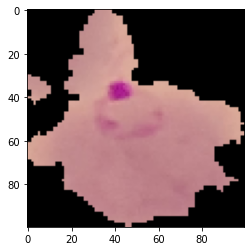

In [42]:
plt.imshow(sample_train_images[10])

In [43]:
sample_train_images[10].shape

(100, 100, 3)

In [44]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

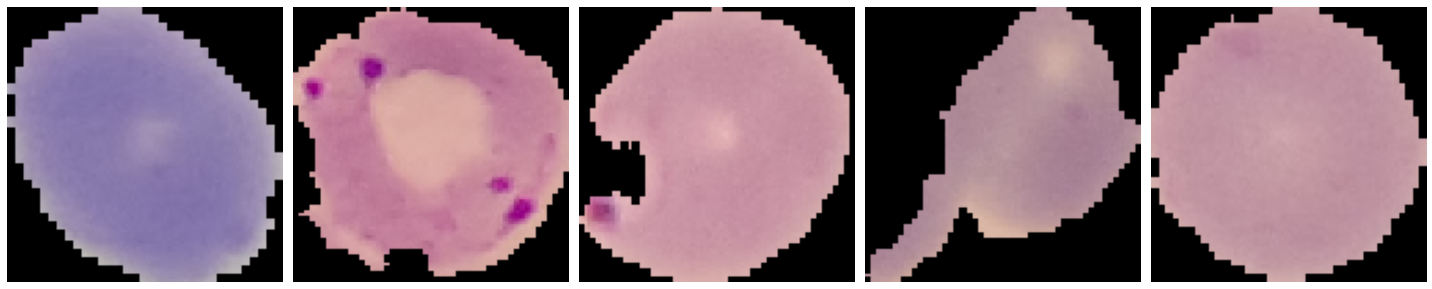

In [45]:
plotImages(sample_train_images[0:5])

In [46]:
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

2022-07-05 12:56:27.774224: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-05 12:56:27.774689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 12:56:27.774899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-05 12:56:27.775025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [48]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,steps_per_epoch=total_train//batch_size,epochs=epochs,
                             validation_data=val_data_gen,validation_steps=total_val//batch_size)

Epoch 1/20


/home/piyush/miniconda3/envs/tensortorch/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-07-05 12:57:23.831537: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2022-07-05 12:57:24.304479: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-05 12:57:24.350867: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-05 12:57:24.350952: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-07-05 12:57:24.352452: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child

55/55 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.5730

In [ ]:
history.history

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    class_mode='binary')

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                class_mode='binary')

In [ ]:
model_new = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_new.summary()

In [ ]:
epochs = 20

In [ ]:
model_new.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model_new.fit(train_data_gen,steps_per_epoch=total_train//batch_size,
                                 epochs=epochs,
                                 validation_data=val_data_gen,
                                 validation_steps=total_val//batch_size)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.models.save_model(model_new,'malaria_cells.h5')

In [ ]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [ ]:
model = tf.keras.models.load_model('malaria_cells.h5')

In [ ]:
model.summary()

In [ ]:
img = load_img('Uninfected.png',target_size=(100,100))

In [ ]:
img

In [ ]:
img = img_to_array(img)

In [ ]:
img

In [ ]:
img.shape

In [ ]:
img = img.reshape(1,100,100,3)

In [ ]:
img.shape

In [ ]:
model.predict(img)

In [ ]:
img2 = load_img('Parasitised2.png',target_size=(100,100))

In [ ]:
img2

In [ ]:
img.shape

In [ ]:
img2 = img.reshape(1,100,100,3)

In [ ]:
img2.shape

In [ ]:
model.predict(img2)